## Task 3

1. Develop yourself using numpy library: 

a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

In [1]:
# import library 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# python function for implementation of gradient descent (GD) with momentum algorithm

def gradient_descent_with_momentum(f, grad_f, learning_rate=0.05, momentum=0.9, num_iterations=1000, init_point=(0,0), tolerance=1e-6):
    x, y = init_point
    velocity_x, velocity_y = 0, 0
    history = [(x, y)]
    
#     Parameters:
#     - f: The objective function to minimize.
#     - grad_f: The gradient of the objective function.
#     - initial_point: Initial point (x0, y0) as a tuple.
#     - learning_rate: Learning rate for gradient descent.
#     - momentum: Momentum parameter (usually between 0 and 1).
#     - num_iterations: Number of iterations to run GD.

    for iteration in range(num_iterations):
        gradient_x, gradient_y = grad_f(x, y)

        velocity_x = momentum * velocity_x + learning_rate * gradient_x
        velocity_y = momentum * velocity_y + learning_rate * gradient_y

        x -= velocity_x
        y -= velocity_y
        history.append((x, y))
        # Check for convergence
        if iteration >= 1 and np.sqrt(gradient_x**2 + gradient_y**2) < tolerance:
#             print("Converged. Stopping gradient descent")
            break

    return x, y, history

In [3]:
# python function for implementation of ADAM optimization algorithm

def adam_optimizer(f, grad_f, learning_rate=0.05, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000, tolerance=1e-6, init_point=(0,0)):
    # Initialize parameters
    x, y = init_point
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    history = [(x, y)]
    t = 1
    
    for iteration in range(max_iterations):
        gradient_x, gradient_y = grad_f(x, y)
        t += 1
        
        m_x = beta1 * m_x + (1 - beta1) * gradient_x
        m_y = beta1 * m_y + (1 - beta1) * gradient_y
        
        v_x = beta2 * v_x + (1 - beta2) * (gradient_x**2)
        v_y = beta2 * v_y + (1 - beta2) * (gradient_y**2)
        
        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)

        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)
        
        # Update parameters
        x = x - learning_rate * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
        y = y - learning_rate * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
        
        history.append((x, y))
        # Check for convergence
        if iteration >= 1 and np.sqrt(gradient_x**2 + gradient_y**2) < tolerance:
#             print("Converged. Stopping gradient descent")
            break

    return x, y, history

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [4]:
# Define the gradient functions
def f(x, y):
    return x**2 + y**2 + np.sin(x)

def grad_f(x, y):
    return 2*x + np.cos(x), 2*y - np.sin(y)

In [5]:
min_gd_x, min_gd_y, history_gd = gradient_descent_with_momentum(f, grad_f, init_point=(1,1))

In [6]:
min_adam_x, min_adam_y, history_adam = adam_optimizer(f, grad_f, init_point=(1,1))

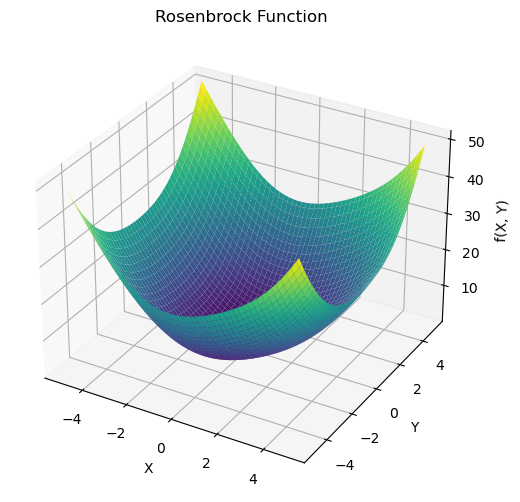

In [7]:
# Define the Rosenbrock function
def rosenbrock(x, y):
    return x**2 + y**2 + np.sin(x) + np.cos(y)

x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
x_values, y_values = np.meshgrid(x_range, y_range)

# Calculate function values for the entire grid
z_values = rosenbrock(x_values, y_values)

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_values, y_values, z_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Rosenbrock Function')

# Show the plot
plt.show()

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

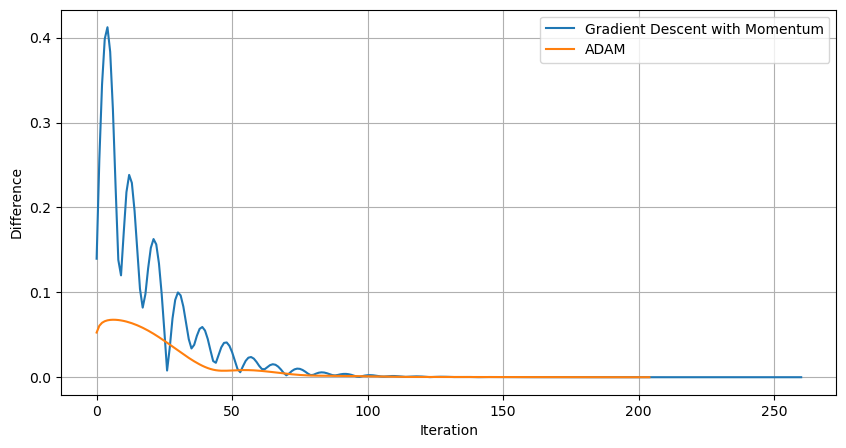

In [8]:
# Calculate difference between successive points

diff_curr_gd = [np.sqrt((history_gd[i+1][0]-history_gd[i][0])**2 + (history_gd[i+1][1]-history_gd[i][1])**2) for i in range(len(history_gd)-1)]
diff_prev_gd = [np.sqrt((history_gd[i][0]-history_gd[i-1][0])**2 + (history_gd[i][1]-history_gd[i-1][1])**2) for i in range(1, len(history_gd))]

diff_curr_adam = [np.sqrt((history_adam[i+1][0]-history_adam[i][0])**2 + (history_adam[i+1][1]-history_adam[i][1])**2) for i in range(len(history_adam)-1)]
diff_prev_adam = [np.sqrt((history_adam[i][0]-history_adam[i-1][0])**2 + (history_adam[i][1]-history_adam[i-1][1])**2) for i in range(1, len(history_adam))]

# Plot
plt.figure(figsize=(10,5))
plt.plot(diff_curr_gd, label="Gradient Descent with Momentum")
plt.plot(diff_curr_adam, label="ADAM")
plt.xlabel("Iteration")
plt.ylabel("Difference")
plt.legend()
plt.grid(True)

4. Write a conclusions about the accuracy of the implemented algorithms.

In optimizing the same function using ADAM optimization and Gradient Descent with Momentum algorithms, significant differences in stability were evident.

Both Gradient Descent with Momentum and ADAM optimization algorithms are robust approaches for optimizing models, each with its strengths and weaknesses in terms of accuracy and performance. The accuracy of these methods depends on the choice of hyperparameters, the function being optimized, and the initial point.

In our case Gradient Descent with Momentum showed convergence with less stability as the function values fluctuated noticeably at each iteration. ADAM optimizatio demonstrated more stable and monotonic convergence with smaller absolute changes in x and y.